In [ ]:
# AlogP prediction using MACHINE LEARNING MODEL
# Author: Saeed, Rifat

In [ ]:
# Upload data
from google.colab import files
uploaded = files.upload()

Saving smallMolecules.csv to smallMolecules.csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['smallMolecules.csv']))

In [ ]:
df2=df[["ChEMBL ID","AlogP","Smiles"]]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35578 entries, 0 to 35577
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ChEMBL ID  35578 non-null  object
 1   AlogP      34668 non-null  object
 2   Smiles     34575 non-null  object
dtypes: object(3)
memory usage: 834.0+ KB


In [ ]:
df3 = df2.dropna()

In [ ]:
df3=df3.mask(df3.eq('None')).dropna()

In [ ]:
df3["AlogP"] = df3.AlogP.astype(float)

In [ ]:
df_second = df3.drop(df3[df3.AlogP<1].index)

In [ ]:
df_first=df3.drop(df3[df3.AlogP>1].index)

In [ ]:
df_second = df_second.drop(df_second[df_second.AlogP>4].index)

In [ ]:
df_first['AlogP'].loc[df_first.AlogP<1] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15015 entries, 2 to 35577
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ChEMBL ID  15015 non-null  object 
 1   AlogP      15015 non-null  float64
 2   Smiles     15015 non-null  object 
dtypes: float64(1), object(2)
memory usage: 469.2+ KB


In [ ]:
df_second.loc[df_second.AlogP<4,'AlogP'] = 1

In [ ]:
df5 = pd.concat([df_first,df_second], axis=0)

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34016 entries, 2 to 35573
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ChEMBL ID  34016 non-null  object 
 1   AlogP      34016 non-null  float64
 2   Smiles     34016 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.0+ MB


In [ ]:
df5=df5.drop(df5[df5.AlogP==4].index)

In [ ]:
df5.groupby(['AlogP']).count()

,ChEMBL ID,Smiles
AlogP,,
0.0,14919,14919
1.0,19093,19093


In [ ]:
df6 = pd.concat([df5['Smiles'],df5['ChEMBL ID']], axis=1 )
f=df6.to_csv('molecule30.smi', sep='\t', index=False, header=False)

In [ ]:
y=df5['AlogP']

In [ ]:
y.shape

(34012,)

In [ ]:
!wget https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
!unzip fingerprints_xml.zip

--2021-12-17 02:20:18--  https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip [following]
--2021-12-17 02:20:18--  https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10871 (11K) [application/zip]
Saving to: ‘fingerprints_xml.zip’

fingerprints_xml.zi 100%[===================>]  10.62K  --.-KB/s    in 0s      

2021-12-17 02:20:18 (72.7 MB/s) - ‘fingerprints_xml.zip’ saved [10871/10871]

Archive:  fingerprints_xm

In [ ]:
#listing and sorting the downloaded files
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [ ]:
#Creating a list of present files
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

In [ ]:
#Creating Data Dictionary
fp = dict(zip(FP_list, xml_files))
fp

{'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'Substructure': 'SubstructureFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml'}

In [ ]:
!pip install padelpy

     |████████████████████████████████| 20.9 MB 6.5 MB/s 


In [ ]:
#Setting the fingerprint module
from padelpy import padeldescriptor
fingerprint = 'Substructure'

fingerprint_output_file = ''.join([fingerprint,'.csv']) #Substructure.csv
fingerprint_descriptortypes = fp[fingerprint]
padeldescriptor(mol_dir='molecule30.smi', 
                d_file=fingerprint_output_file, #'Substructure.csv'
                #descriptortypes='SubstructureFingerprint.xml', 
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
descriptors5 = pd.read_csv(fingerprint_output_file)

In [ ]:
descriptors5.shape

(34012, 308)

In [ ]:
X = descriptors5.drop('Name', axis=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34012 entries, 0 to 34011
Columns: 307 entries, SubFP1 to SubFP307
dtypes: int64(307)
memory usage: 79.7 MB


In [ ]:
X.head()

,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,SubFP10,SubFP11,SubFP12,SubFP13,SubFP14,SubFP15,SubFP16,SubFP17,SubFP18,SubFP19,SubFP20,SubFP21,SubFP22,SubFP23,SubFP24,SubFP25,SubFP26,SubFP27,SubFP28,SubFP29,SubFP30,SubFP31,SubFP32,SubFP33,SubFP34,SubFP35,SubFP36,SubFP37,SubFP38,SubFP39,SubFP40,...,SubFP268,SubFP269,SubFP270,SubFP271,SubFP272,SubFP273,SubFP274,SubFP275,SubFP276,SubFP277,SubFP278,SubFP279,SubFP280,SubFP281,SubFP282,SubFP283,SubFP284,SubFP285,SubFP286,SubFP287,SubFP288,SubFP289,SubFP290,SubFP291,SubFP292,SubFP293,SubFP294,SubFP295,SubFP296,SubFP297,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1


In [ ]:
# Removing all low-variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.95 * (1 - .95)))
X1 = selection.fit_transform(X)
X1.shape 


(34012, 32)

In [ ]:
# Splitting data into traing and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2)
X_train.shape, y_train.shape 
X_test.shape, y_test.shape

((6803, 32), (6803,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
n_est=range(200,1000,200)
for n in n_est: 
  rf = RandomForestClassifier(n_estimators =n, random_state = 42)
  # Train the model on training data
  rf.fit(X_train,y_train)
  accuracy_train=rf.score(X_train,y_train)
  print(accuracy_train)
  accuracy_test=rf.score(X_test,y_test)
  accuracy_test

0.8396118931235989
0.8396118931235989
0.8396118931235989
0.8396118931235989


In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2248,  790],
       [ 604, 3161]])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision: %.3f' % precision_score(y_test, y_pred)) 
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.800
Recall: 0.840
F1 Score: 0.819


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test,y_pred)
print(mse) 
rmse=sqrt(mse)
print(rmse)

0.20490959870645303
0.4526694143704134


In [ ]:
# Cross Validation for model performance
from sklearn.model_selection import cross_val_score
cross_val_score(rf, X1,y, cv=10).mean() 

0.791985446753652

In [ ]:
# predict probabilities
lr_probs = rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [ ]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest Classifier: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Random Forest Classifier: ROC AUC=0.876


In [ ]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

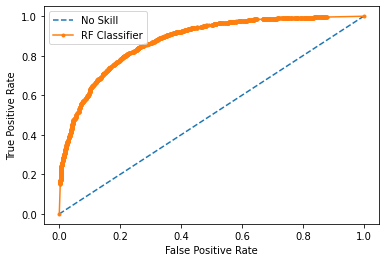

In [ ]:
# plot the roc curve for the model
import matplotlib.pyplot as plt
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='RF Classifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()